## Titanic Survival Prediction using Machine Learning
###### Name = Prathamesh Sanjay Pawar

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the data
data_titanic = pd.read_csv("D:titanic.csv")

In [3]:
# printing the data
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# droping unnecessary columns
data_titanic.drop(columns=['Cabin'], inplace=True)

In [5]:
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [6]:
# checking the null values
data_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [7]:
# filling up the null values
# 1. filling up the null values in age column
data_titanic['Age'].fillna(data_titanic['Age'].mean(),inplace=True)

# 2. fiiling up the null values in embarked column
# finding out the mode
# df['Embarked'].mode()[0] 
data_titanic['Embarked'].fillna(data_titanic['Embarked'].mode()[0], inplace=True)

In [8]:
# we don't have any null vakues in such data
data_titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 2. EDA

In [9]:
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
# getting the insides of data
data_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# converting a sex column string to number
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_titanic['Sex'] =le.fit_transform(data_titanic['Sex'])

In [12]:
# converting the embarked column string to number
data_titanic.replace({'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [13]:
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


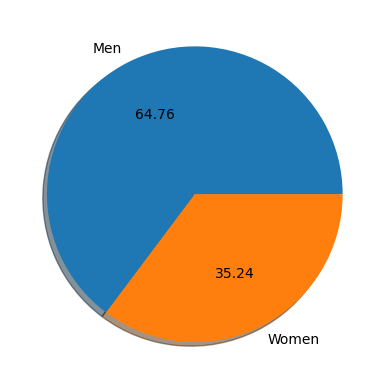

In [14]:
# creating a pie chart get a information about ratio of men and women on the ship
plt.pie(data_titanic['Sex'].value_counts() , labels=['Men', 'Women'],autopct='%0.2f' , shadow=20)
plt.show()

In [15]:
sns.set()

In [16]:
data_titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

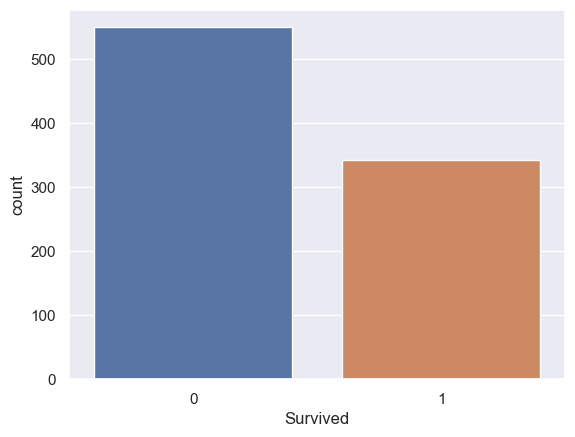

In [17]:
# ratio of survival between men and women
sns.countplot(x='Survived', data= data_titanic)

<Axes: xlabel='Survived', ylabel='count'>

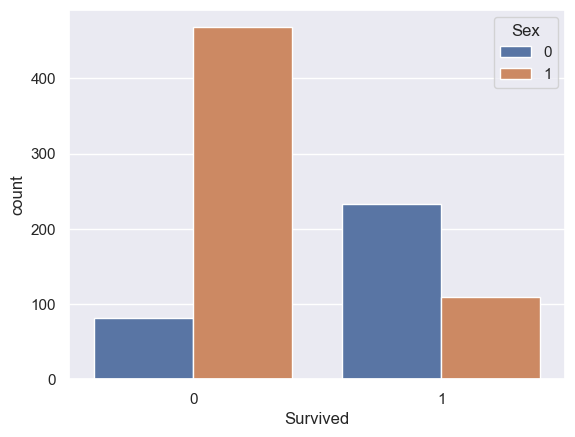

In [18]:
sns.countplot(x='Survived', hue='Sex' , data= data_titanic)

<Axes: xlabel='Pclass', ylabel='count'>

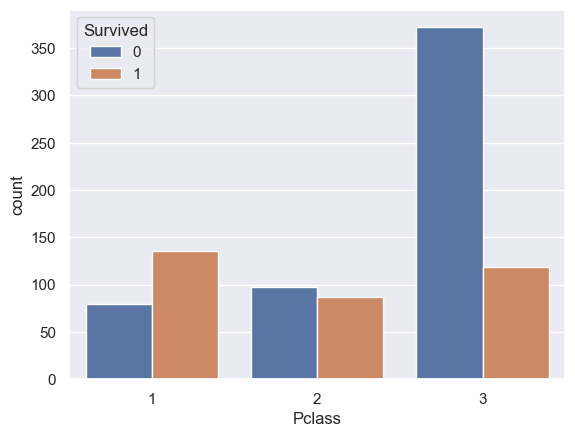

In [19]:
sns.countplot( x='Pclass', hue='Survived', data=data_titanic)

<Axes: xlabel='Age'>

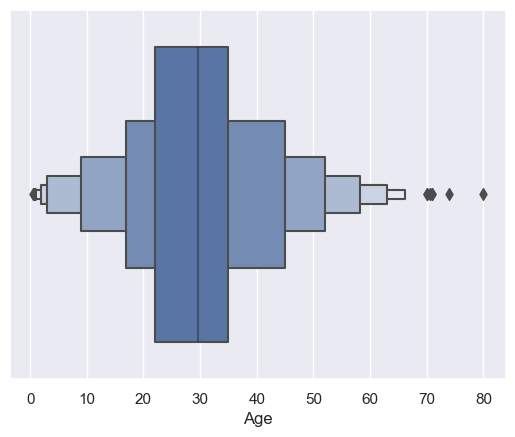

In [20]:
sns.boxenplot(x='Age', data= data_titanic)

## 3. Model tranning

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()

In [22]:
X = data_titanic.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = data_titanic['Survived']

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [24]:
# fiting the Logistic Regression model with training data
model.fit(X_train, Y_train)

c:\Users\pawar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
# accuracy on training data
X_pred = model.predict(X_train)

## 4. model evaluation

In [26]:
training_data_accuracy = accuracy_score(Y_train, X_pred)
print('Accuracy score of training data : ', training_data_accuracy)

# accuracy on test data
X_test_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_pred)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of training data :  0.8117977528089888
Accuracy score of test data :  0.7821229050279329
